In [2]:
%config IPCompleter.greedy=True

## Product Category Recommendations

----

### Problem Statement:
 ----
 
    With rapid growth of e-commerce industry in the recent years and the amount of expansions seen in variety of product categories for new products that are being sold on website’s has been on rise - to boost the sales and the revenue for the company. The scope of selling new products within new lines of categories overall improves the diversity of the products being sold. The first step to undertake with the addition of new products before publishing them on to website is to have them slotted to appropriate product categories. 
	
    In order for the business personnel or the Web Specialist(WS) - who is usually tasked to slot new products to appropriate categories by manually choosing the category from an enormous hierarchical category data, with some form of GUI, involves each WS to be trained on a variety of categories where a particular product can be slotted to. With hundreds of products in place, this can be a tedious process to have repetitive steps for each product slotting. Instead, if we can provide top three or top five recommended product categories based on analysis & predictions with previous data and based on features or specifications of the product which is to be slotted, then it would save tons of time and overall accuracy of product slotting can be increased to a greater extent.

----

### Potential Clients:
----

Any Retail/ E-Commerce Industry - Amazon, BestBuy, Etsy etc.

Data: <a href='https://www.kaggle.com/PromptCloudHQ/flipkart-products'>Flipkart Dataset from Kaggle </a>

Some of the variables that can be considered to provide category recommendations include:

1. Product Brand

2. Product Name

3. Product Description

4. Product Specifications

*Response Variable/ Label/ Y- Variable/ Output Variable:* **Product Category**


#### **Deliverables:**
1. Prediction model
2. Report
3. Visualization



## Data Exploration

In [3]:
# Import all required libraries that aid in data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import json 
from pandas.io.json import json_normalize
%matplotlib inline  

# Import the dataset to a dataframe in its raw form
flipkart_df = pd.read_csv("../datasets/flipkart_com-ecommerce_sample.csv")

In [4]:
# Examine the structure of data
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [5]:
# Examine the first few observations
flipkart_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
# Explore the column names
flipkart_df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
# Explore quantitative columns with some summary statistics
flipkart_df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [8]:
# Explore the counts of each category in Predictor variable 
flipkart_df.product_category_tree.value_counts().head()

["Jewellery >> Necklaces & Chains >> Necklaces"]                                                       1567
["Jewellery >> Rings"]                                                                                  710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]      522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]     332
Name: product_category_tree, dtype: int64

In [9]:
# Explore the unique entries data for Predictor variable
flipkart_df.product_category_tree.unique()

array(['["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]',
       '["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]',
       '["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]',
       ...,
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Fun To See Stickers"]'],
      dtype=object)

## Data Wrangling

----

From the initial data exploration, it shows that the dataset needs to be wrangled, before it can be signed off as an analysis ready dataset.

----

#### The following columns will be explored and cleaned for analysis.
1. uniq_id
2. crawl_timestamp
3. product_url
4. product_name
5. product_category_tree
6. pid
7. retail_price
8. discounted_price
9. image
10. is_FK_Advantage_product
11. description
12. product_rating
13. overall_rating
14. brand
15. product_specifications

----

#### Steps Involved:
Google Doc: https://docs.google.com/document/d/1PgOrrvC137R13NA6MCfgPFe5ViTss5oXmNQ_AYznG1M/

----

##### Importing necessary packages : 
    This allows us to use the underlying functions and methods and easily just by using the alias created. 

----

#####  Importing data from a csv file in its raw form : 
    The first step involved was to import the raw data from file to a dataframe using pandas read_csv() utility.

----

#####  Examine the imported dataframe: 
    1. .info() - This gives a high level summary of the data that lies in the dataframe. For example - the type of data in each column, the number of non null entries, coerced data types, etc.

    2. .head() - examine the first few rows, to get the gist of type of values for each column. For example, null values can be identified at early stages.

    3. .columns - can get details on the column names and the no.of columns in the dataset. This was useful to clean up the column names - for example - If the column names have unnecessary spaces or can reassign new column names to be precise on what kind of info is depicted by that column.

    4. .describe() - this gives a high level summary statistics of all quantitative columns.

    5. .value_counts() - to identify frequency counts for categorical data

    6. .unique() - To get the unique values of a particular column. For instance, if a column has null values and we are not sure about how the null values are stored, we can identify it using this.

----

#####  Identifying and choosing the appropriate Index:
    After examining the raw dataset using the above methods, if a particular column has a unique identifier for each row/case/observation/subject and describes an appropriate meaning to each observation, then this column can be conveniently used to set as index leveraging pandas set_index() method or can be performed while doing the read_csv() import with index_col attribute.

    After examining the dataframe in step 3, the most appropriate unique identifier for this dataset would be “product identifier (pid)” column, as this uniquely identifies each observation. So, we can re-set the index to “pid” column (after removing any duplicates - explained in later part of this document).

----

#####  Verify the correctness of data type for each column: 
    Examine using the info() method.

    (i). Span the use of category type: 
    If a column has categorical data and its datatype is 'object', this can be changed to 'category' type - as its good to use for memory efficiency. This can be done easily using .astype('category').
    
    Reference:  flipkart_df column: "product_category_tree"

    (ii). Deal with coerced types :
     If a numeric column (for eg: price) is of dtype: object then it means - the data of that column needs to be examined further. This is often the case that some of the missing values may be set to some string(eg: 'missing') instead of NaN, as a result the data type is coerced to 'object' in other words, string. This can be handled by using .to_numeric() method on the column. But, before using this conversion "null" values need to be handled using any of the techniques above
    
    Reference:  flipkart_df column: "overall_rating"

    (iii). Handling datetime objects : 
    Date columns need to be imported as pandas datetime objects as it would make the dataset easier to access for further analysis of data. We can do this using pandas to_datetime() method or can be performed while doing the read_csv() import with parse_dates attribute.
    
    Reference: flipkart_df column : "crawl_timestamp"

----

#####  Handle "null" values :

    These can often be represented as - empty strings, NaN's, NA, 'missing' or in any other format. Can be examined by using head(), unique(), isnull(), values etc,.

    Following can be used to handle null/empty values :
    1. dropna() - Delete records with null entries, not a great choice since most of the data is lost.
    2. fillna() - Broadcast null entries with a particular value.
    3. Custom Python functions - Impute using custom generated values
    4. { } - Broadcast using Dict comprehensions
    5. .map() - Using other column data as a basis to fill in the null entries.
    
    Reference:  flipkart_df column : "brand"

----

#####  Handling duplicates :

    Duplicates are removed using drop_duplicates() method. If dropping is based only on a particular column, that column name can be provided as a value to the subset attribute.
    For example: In flipkart_df - "pid" column has duplicate entries (meaning has the same product details). In this case we can safely discard the duplicate entries retaining one entry and removing the duplicate entry.

    Reference:  flipkart_df column : "pid"

----

#####  Normalize embedded json values :

    Some of the column values may contain embedded json as their which is required to normalize to make the dataset tidy and ready for analysis.
    
    Reference:  flipkart_df column : product_specifications

----

#####  Joining dataframes :

    After retrieving the json data as columns, it needs to be joined back onto the original dataframe on which the analysis will be performed.
    
    Reference:  flipkart_df and product_specifications join

----

#####  Reindex columns :

    To reorder the columns in a dataframe we can use the .reindex() method of dataframe.
    
    Reference:  flipkart_df.reindex(columns...

# uniq id

In [10]:
# Setting the index using 'index_col' while importing data to dataframe
flipkart_df = pd.read_csv("../datasets/flipkart_com-ecommerce_sample.csv",index_col=0)
flipkart_df.head()

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# pid

In [11]:
# On further examination 'pid' column would be the most appropriate index
flipkart_df['pid'][0:5]

uniq_id
c2d766ca982eca8304150849735ffef9    SRTEH2FF9KEDEFGF
7f7036a6d550aaa89d34c77bd39a5e48    SBEEH3QGU7MFYJFY
f449ec65dcbc041b6ae5e6a32717d01b    SHOEH4GRSUBJGZXE
0973b37acd0c664e3de26e97e5571454    SRTEH2F6HUZMQ6SJ
bc940ea42ee6bef5ac7cea3fb5cfbee7    PSOEH3ZYDMSYARJ5
Name: pid, dtype: object

In [12]:
# To identify duplicate entries in 'pid' column
flipkart_df[flipkart_df['pid'].duplicated(keep='first')]
# Another approach to finding duplicates
# pid_series=flipkart_df['pid'].value_counts() > 1 
# pid_series[pid_series == True]

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
82f424a90d630acc188fcf267160a1fe,2016-06-16 06:18:58 +0000,http://www.flipkart.com/hako-60w-magsafe1-lapt...,Hako 60W Magsafe1 Laptop Charger For APPLE Mac...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe1 Laptop Charg...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
2867c80d88e3693c883463e6358e6cc5,2016-05-10 11:57:25 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> TIMBERLAKE W...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."


In [13]:
# Duplicate entry records
flipkart_df[flipkart_df['pid'].isin(['JEAEGE8Q8GXYFTGU','ACCEJ6TESY7AFT5W'])].sort_values(by='pid')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
3ddf7a0f5669f84751a36469af11b877,2016-06-10 22:31:19 +0000,http://www.flipkart.com/hako-60w-magsafe-lapto...,Hako 60W Magsafe Laptop Charger For APPLE MacB...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe Laptop Charge...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
82f424a90d630acc188fcf267160a1fe,2016-06-16 06:18:58 +0000,http://www.flipkart.com/hako-60w-magsafe1-lapt...,Hako 60W Magsafe1 Laptop Charger For APPLE Mac...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe1 Laptop Charg...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
f4e20863651ea54537388f1cd77a8776,2016-05-12 14:18:51 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> Western Wear...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."
2867c80d88e3693c883463e6358e6cc5,2016-05-10 11:57:25 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> TIMBERLAKE W...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."


In [14]:
# Removes the above identified duplicate values based on 'pid'
flipkart_df = flipkart_df.drop_duplicates(subset='pid',keep='first')

# Removed two duplicate pid rows retaining only one entry each 
flipkart_df[flipkart_df['pid'].isin(['JEAEGE8Q8GXYFTGU','ACCEJ6TESY7AFT5W'])].sort_values(by='pid')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
3ddf7a0f5669f84751a36469af11b877,2016-06-10 22:31:19 +0000,http://www.flipkart.com/hako-60w-magsafe-lapto...,Hako 60W Magsafe Laptop Charger For APPLE MacB...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe Laptop Charge...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
f4e20863651ea54537388f1cd77a8776,2016-05-12 14:18:51 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> Western Wear...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."


In [15]:
# Setting the index using 'pid' column
flipkart_df.set_index('pid',inplace=True)

In [16]:
# pid is set as the unique identifier(index) for each observation
flipkart_df.head()

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
SHOEH4GRSUBJGZXE,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
SRTEH2F6HUZMQ6SJ,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
PSOEH3ZYDMSYARJ5,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [17]:
# pid is not referenced as column, after being used as index
flipkart_df.columns

Index(['crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'retail_price', 'discounted_price', 'image',
       'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

# crawl_timestamp

In [18]:
# Converting to datetime object and formatting to ISO-8601 format
flipkart_df.crawl_timestamp=pd.to_datetime(pd.to_datetime(flipkart_df['crawl_timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S'))
flipkart_df.sort_values(by='crawl_timestamp',inplace=True)

In [19]:
# flipkart_df.crawl_timestamp.unique()

# product_url

In [20]:
#No clean up needed - No nulls entries
len(flipkart_df.product_url.unique())

19998

In [21]:
flipkart_df.product_url.unique()[:5]

array(['http://www.flipkart.com/denver-caliber-pride-combo-set/p/itmebtjbbh5rjjzh?pid=CAGEBTJBTZ9HK4AU',
       'http://www.flipkart.com/kolkata-knight-riders-combo-set/p/itmeyfzwbtjhxmum?pid=CAGEYFZWDZYE5VPH',
       'http://www.flipkart.com/disney-minnie-cartoon-art-plastic-pencil-box/p/itme5yg73ckf7fgg?pid=PBXE5YG7NN4GWTKG',
       'http://www.flipkart.com/jewelizer-crystal-alloy-necklace/p/itme2f5hexgrdaxe?pid=NKCE2F5HBJYC6TBZ',
       'http://www.flipkart.com/priya-exports-angel-bear-art-plastic-pencil-box/p/itme6jckae9fxegg?pid=PBXE6JCKFHDZBZYQ'],
      dtype=object)

# product_name

In [22]:
#No clean up needed - No nulls entries
len(flipkart_df.product_name)

19998

In [23]:
flipkart_df.product_name.unique()[:5]

array(['Denver Caliber,Pride Combo Set',
       'Kolkata Knight Riders Combo Set',
       'Disney Minnie Cartoon Art Plastic Pencil Box',
       'Jewelizer Crystal Alloy Necklace',
       'Priya Exports Angel Bear Art Plastic Pencil Box'], dtype=object)

In [24]:
# change to type 'Category'
flipkart_df.product_name=flipkart_df.product_name.astype('category')

In [25]:
len(flipkart_df.product_name.unique())

12675

# product_category_tree

*The PREDICTOR variable*

In [26]:
#Sample value
flipkart_df.product_category_tree[0] 

'["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Denver Combos"]'

In [27]:
# Extracting only the first substring as a primary category
# set the datatype to 'Category'
flipkart_df.product_category_tree=flipkart_df.product_category_tree.str.replace('[','').str.replace(']','').str.split('>>').str[0].str.strip('\"').str.strip().astype('category')               

In [28]:
#retrieves unique categories as a series
flipkart_df.product_category_tree.unique()[:2]

[Beauty and Personal Care, Toys & School Supplies]
Categories (265, object): [Beauty and Personal Care, Toys & School Supplies, Jewellery, Pens & Stationery, ..., NEWGEN TECH EO-HS3303 218 Wired Headset (White), ATV Pouch for Acer Liquid Z330 (STEEL BLUE), Himmlisch 20503 Car Bottle Holder (Plastic), ABEEZ Boys, Men, Girls (Black, Pack of 1)]

In [29]:
# Categories with one product
df=flipkart_df.product_category_tree.value_counts() == 1
df[df].head()
# Upon examination, these reveal to be child categories 
# which can be mapped to primary categories based on some 
# identified keywords.

Impala Alloy Cufflink (White)                          True
Kraft Seeds Thyme Herbs Seed (200 per packet)          True
Kraft Seeds Rosemary Herb (Pack Of 5) Seed (75 p...    True
GM Power mate 4 Strip Surge Protector (White)          True
Kraft Seeds Dill Herb Seed (50 per packet)             True
Name: product_category_tree, dtype: bool

In [30]:
# Below function takes in a list of search strings and identifies if any of those strings match 
# in the product_category_tree column - if match is found it is replaced with the respective primary 
# category value. This is useful to map the child category of products to their primary category.
def map_to_primary_category(flipkart_df,strlist,category):
    ''' Maps the given column to the primary category based on search strings'''
    flipkart_df['product_category_tree']=flipkart_df['product_category_tree'].map(lambda x: category if any(f in x for f in strlist) else x)

In [31]:
# Mapped all the product categories having 1 product each, to respective primary categories
map_to_primary_category(flipkart_df,['Jeans','Trousers','Kurta','Vest','Lingerie','Pyjama','Sweater','Semi-stitched','T-Shirt','Bra','Stole','Brief','Trousers','Gloves','Jacket',"Women's Top"],'Clothing') 
map_to_primary_category(flipkart_df,['Wedges','Sandals','Socks','Slippers','Flats'],'Footwear')
map_to_primary_category(flipkart_df,['Nail Cutter','Sandals','Bellies','Socks','Boxer','Camisole','Shoes','Dress','Slippers','Flats'],'Beauty and Personal care') 
map_to_primary_category(flipkart_df,['Sunglasses'],'Jewellery') 
map_to_primary_category(flipkart_df,['Tablet','Charging Pack','LCD LCD','Smart Devices','Acer','Arm Sleeve','Sound Mixer'],'Computers')
map_to_primary_category(flipkart_df,['Long Lasting Car','Bajaj','Cufflink','Vehicles','Bike Side Stand'],'Automotive')
map_to_primary_category(flipkart_df,['Clutch'],'Bags, Wallets & Belts')
map_to_primary_category(flipkart_df,['Showpiece'],'Home Decor & Festive Needs')

In [32]:
# Rename column product_category_tree to product_category
flipkart_df.rename(columns={"product_category_tree": "product_category"},inplace=True)
flipkart_df.product_category=flipkart_df.product_category.astype('category')  
flipkart_df.product_category.value_counts()

Clothing                                                6290
Jewellery                                               3588
Footwear                                                1260
Mobiles & Accessories                                   1099
Automotive                                              1018
Home Decor & Festive Needs                               931
Beauty and Personal Care                                 710
Home Furnishing                                          700
Kitchen & Dining                                         647
Computers                                                588
Watches                                                  530
Baby Care                                                483
Tools & Hardware                                         391
Toys & School Supplies                                   330
Pens & Stationery                                        313
Bags, Wallets & Belts                                    268
Furniture               

In [33]:
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,http://www.flipkart.com/denver-caliber-pride-c...,"Denver Caliber,Pride Combo Set",Beauty and Personal Care,409.0,370.0,"[""http://img6a.flixcart.com/image/combo-gift-s...",False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,Beauty and Personal Care,380.0,315.0,"[""http://img5a.flixcart.com/image/combo-gift-s...",False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."


# retail_price

In [34]:
len(sorted(flipkart_df.retail_price,reverse=True))

19998

In [35]:
# Null entries are correctly set to np.NaN
flipkart_df[flipkart_df['retail_price'].isnull()].head(2)

,crawl_timestamp,product_url,product_name,product_category,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SCHE5Z57FHVKZD3C,2015-12-01 06:13:00,http://www.flipkart.com/abb-premium-make-6-one...,ABB Premium Make 6 One Way Electrical Switch,Home Improvement,NaN,NaN,"[""http://img5a.flixcart.com/image/electrical-s...",False,ABB Premium Make 6 One Way Electrical Switch (...,No rating available,No rating available,ABB,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
PBXECWKZHWRCZZPJ,2015-12-01 06:13:00,http://www.flipkart.com/fcs-magnetic-double-si...,FCS Magnetic with Double Sided Gift Cartoon Ar...,Toys & School Supplies,NaN,NaN,"[""http://img5a.flixcart.com/image/pencil-box/z...",False,Flipkart.com: Buy FCS Magnetic with Double Sid...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Series"", ""..."


# Derive new Column: final_price

In [36]:
# Renaming column
flipkart_df.rename(columns={'discounted_price':'final_price'},inplace=True)

# discounted_price

In [37]:
# Discount amount as a difference between retail and final price
flipkart_df['discounted_price'] = flipkart_df['retail_price']-flipkart_df['final_price']
flipkart_df[['discounted_price','retail_price','final_price'] ]
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,http://www.flipkart.com/denver-caliber-pride-c...,"Denver Caliber,Pride Combo Set",Beauty and Personal Care,409.0,370.0,"[""http://img6a.flixcart.com/image/combo-gift-s...",False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",39.0
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,Beauty and Personal Care,380.0,315.0,"[""http://img5a.flixcart.com/image/combo-gift-s...",False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",65.0


In [38]:
# Null entries are correctly set to np.NaN
flipkart_df[flipkart_df['discounted_price'].isnull()].head(2)

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
SCHE5Z57FHVKZD3C,2015-12-01 06:13:00,http://www.flipkart.com/abb-premium-make-6-one...,ABB Premium Make 6 One Way Electrical Switch,Home Improvement,NaN,NaN,"[""http://img5a.flixcart.com/image/electrical-s...",False,ABB Premium Make 6 One Way Electrical Switch (...,No rating available,No rating available,ABB,"{""product_specification""=>[{""key""=>""Brand"", ""v...",NaN
PBXECWKZHWRCZZPJ,2015-12-01 06:13:00,http://www.flipkart.com/fcs-magnetic-double-si...,FCS Magnetic with Double Sided Gift Cartoon Ar...,Toys & School Supplies,NaN,NaN,"[""http://img5a.flixcart.com/image/pencil-box/z...",False,Flipkart.com: Buy FCS Magnetic with Double Sid...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Series"", ""...",NaN


# image

In [39]:
# Parsing only the image URL
flipkart_df['image'] = flipkart_df['image'].str.split('"').str[1]

In [40]:
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,http://www.flipkart.com/denver-caliber-pride-c...,"Denver Caliber,Pride Combo Set",Beauty and Personal Care,409.0,370.0,http://img6a.flixcart.com/image/combo-gift-set...,False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",39.0
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,Beauty and Personal Care,380.0,315.0,http://img5a.flixcart.com/image/combo-gift-set...,False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",65.0


# is_FK_Advantage_product

In [41]:
flipkart_df[flipkart_df.is_FK_Advantage_product.isnull()] # no Null entries 

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,


# description

In [42]:
flipkart_df[flipkart_df.description.isnull()] # Has 2 NaN rows
# Retaining as-is

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
CPCE2ZME2P7BMJFB,2015-12-20 08:26:17,http://www.flipkart.com/amore-abstract-cushion...,Amore Abstract Cushions Cover,Home Furnishing,499.0,299.0,http://img6a.flixcart.com/image/cushion-pillow...,False,NaN,No rating available,No rating available,Amore,"{""product_specification""=>[{""key""=>""Brand"", ""v...",200.0
TOPEYV38KYVJKM54,2016-01-06 18:20:45,http://www.flipkart.com/ozel-studio-casual-sle...,Ozel Studio Casual Sleeveless Printed Women's Top,Clothing,1290.0,645.0,http://img6a.flixcart.com/image/top/p/z/p/t-00...,False,NaN,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""...",645.0


# Handling nulls: Approach - 1 

# product_rating

In [43]:
 # Re-iterate the read_csv import with na_values in dict form
flipkart_df.product_rating=pd.to_numeric(flipkart_df['product_rating'],errors='coerce')
flipkart_df.product_rating.unique()

array([nan, 3. , 4.7, 1. , 5. , 4.1, 2. , 4.3, 3.1, 4. , 3.3, 2.3, 3.7,
       4.5, 2.9, 4.9, 3.4, 4.2, 3.8, 3.2, 2.7, 2.8, 3.9, 4.8, 4.4, 3.6,
       3.5, 2.5, 4.6, 2.2, 2.6, 2.4, 1.5, 1.3, 1.7, 1.8])

In [44]:
# Products without product rating
flipkart_df[flipkart_df.product_rating.isnull()].shape

(18149, 14)

# overall_rating

In [45]:
# If ‘ignore’, then invalid parsing will return the input
# pd.to_numeric(flipkart_df['overall_rating'],errors='ignore')

# If ‘coerce’, then invalid parsing will be set as NaN
flipkart_df.overall_rating = pd.to_numeric(flipkart_df['overall_rating'],errors='coerce')
flipkart_df.overall_rating.unique()

array([nan, 3. , 4.7, 1. , 5. , 4.1, 2. , 4.3, 3.1, 4. , 3.3, 2.3, 3.7,
       4.5, 2.9, 4.9, 3.4, 4.2, 3.8, 3.2, 2.7, 2.8, 3.9, 4.8, 4.4, 3.6,
       3.5, 2.5, 4.6, 2.2, 2.6, 2.4, 1.5, 1.3, 1.7, 1.8])

In [46]:
# Products without overall rating
flipkart_df[flipkart_df.overall_rating.isnull()].shape

(18149, 14)

# Handling nulls: Approach - 2

*read_csv import to handle nulls* 

na_values={'product_rating':'No rating available','overall_rating':'No rating available'})

# brand

In [47]:
# Check for null values
flipkart_df[flipkart_df.brand.isnull()].head(2)

# Null values are correctly referred as NaN

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,http://www.flipkart.com/denver-caliber-pride-c...,"Denver Caliber,Pride Combo Set",Beauty and Personal Care,409.0,370.0,http://img6a.flixcart.com/image/combo-gift-set...,False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",NaN,NaN,NaN,"{""product_specification""=>[{""key""=>""Number of ...",39.0
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,Beauty and Personal Care,380.0,315.0,http://img5a.flixcart.com/image/combo-gift-set...,False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,NaN,NaN,NaN,"{""product_specification""=>[{""key""=>""Number of ...",65.0


In [48]:
flipkart_df['brand']=[str(k).split()[0] if v is np.NaN else k for k,v in zip(flipkart_df['product_name'],flipkart_df['brand'])] 

In [49]:
flipkart_df[flipkart_df.brand.isnull()].head()

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,


In [50]:
flipkart_df.loc[['CAGEBTJBTZ9HK4AU','CAGEYFZWDZYE5VPH'],:]

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,http://www.flipkart.com/denver-caliber-pride-c...,"Denver Caliber,Pride Combo Set",Beauty and Personal Care,409.0,370.0,http://img6a.flixcart.com/image/combo-gift-set...,False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",NaN,NaN,Denver,"{""product_specification""=>[{""key""=>""Number of ...",39.0
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,Beauty and Personal Care,380.0,315.0,http://img5a.flixcart.com/image/combo-gift-set...,False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,NaN,NaN,Kolkata,"{""product_specification""=>[{""key""=>""Number of ...",65.0


In [51]:
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,http://www.flipkart.com/denver-caliber-pride-c...,"Denver Caliber,Pride Combo Set",Beauty and Personal Care,409.0,370.0,http://img6a.flixcart.com/image/combo-gift-set...,False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",NaN,NaN,Denver,"{""product_specification""=>[{""key""=>""Number of ...",39.0
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,Beauty and Personal Care,380.0,315.0,http://img5a.flixcart.com/image/combo-gift-set...,False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,NaN,NaN,Kolkata,"{""product_specification""=>[{""key""=>""Number of ...",65.0


# product_specification

In [52]:
def heatmap_nulls(flipkart_df,title,xlabel):
    %matplotlib inline
    plt.subplots(figsize=(10,10))
    sns.heatmap(flipkart_df.isnull(), cbar=True, cmap="YlGnBu_r")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

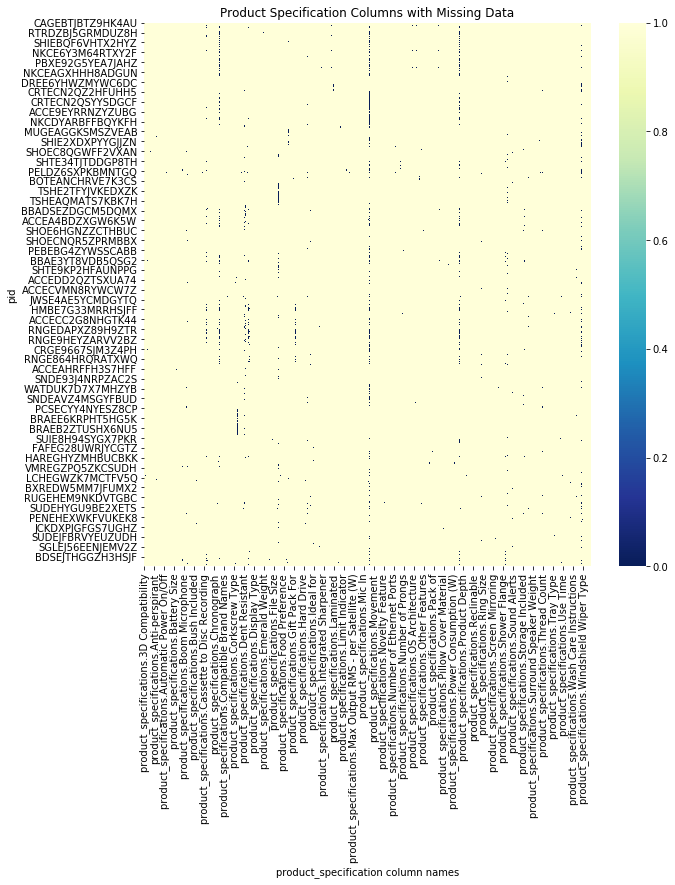

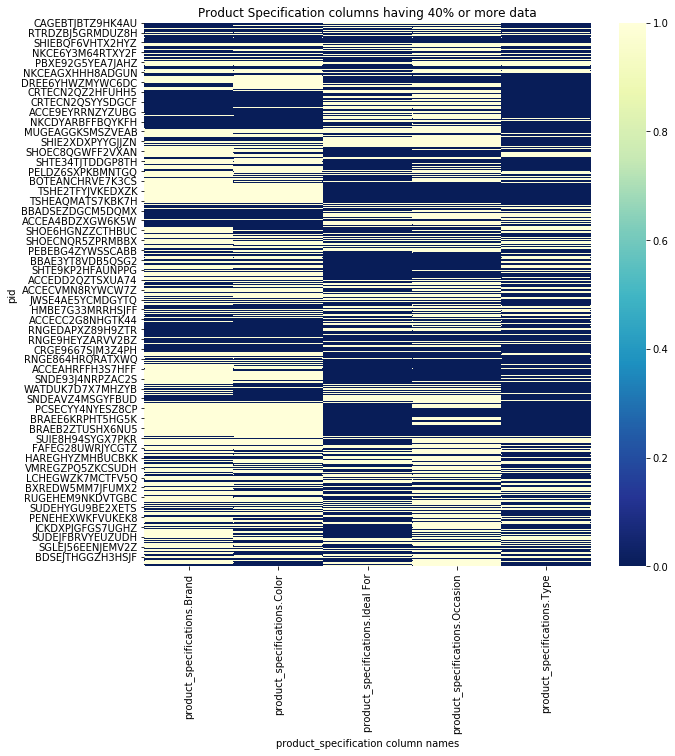

In [53]:
# Extract copy of original dataframe, 
# to wrangle 'product_specification' column 
# having embedded Json values & join data back to the original 
# dataframe once the column data is normalized.

# Copy original dataframe
spec_df = flipkart_df.copy()

# Reset index as 'pid' column to later use for joining to original df
spec_df.reset_index(inplace=True)

# Retain only the necessary columns for JSON normalization
# Including the 'pid' column as this will be the basis for 
# join to original dataframe
spec_df= spec_df[['pid','product_specifications']]

# Examine columns
spec_df.columns

# Check for null values
spec_df[spec_df.product_specifications.isnull()] # There are 14 null values correctly marked as np.NaN

# Some of the values are represented as '{"product_specification"=>nil}' 
# which can be ignored for json normalization
spec_df['product_specifications']=spec_df['product_specifications'].map(lambda x: np.NaN if x == '{"product_specification"=>nil}' else x) 

# Retain only non-null values for Json Normalization
spec_df = spec_df[spec_df['product_specifications'].notnull()]

# Make 'product_specifications' column values as String to perform data cleaning
spec_df['product_specifications'] = spec_df['product_specifications'].astype('str')

# Clean null keys and values and convert to dictionary Json data
spec_df['product_specifications'] = spec_df['product_specifications'].apply(lambda x:{ i['key']:i['value'] for i in json.loads(x.replace('=>',':'))['product_specification'] if 'key' in i and 'value' in i and i != ''} if x != '' and 'key' in x and 'value' in x else x)

# Map empty dictionaries to np.NaN as these can excluded from Json Normalization
spec_df['product_specifications']=spec_df['product_specifications'].map(lambda x: np.NaN if x == {} else x) 

# After formatting to dict, re-check for empty dictionaries to exclude from Json Normalization
spec_df = spec_df[spec_df.product_specifications.notnull()]

# Check for null values after clean up
spec_df[spec_df.product_specifications.isnull()] # There are 0 null values

# converting spec_df to json data
spec_json=json.loads(spec_df.to_json(orient="records"))

# Flatten the Json data along with retaining the index 'pid' as a column
product_specification=json_normalize(spec_json)

# Set the index as 'pid'
product_specification.set_index('pid',inplace=True)

# Visualize the amount of null data in each normalized columns
heatmap_nulls(product_specification,'Product Specification Columns with Missing Data','product_specification column names')

# From the (fig:1) below it is clear that more no. of columns data is missing
# Drop columns having 40% or less data  in the product Specfication
threshold = 40
data_columns=product_specification[product_specification.notnull()].count() / 19998 * 100 > threshold
product_spec_columns=data_columns[data_columns].index

# Retain only columns with 40% or more data
product_specification=product_specification.loc[:,product_spec_columns]

# Visualize the amount of null values in each normalized columns
heatmap_nulls(product_specification,'Product Specification columns having 40% or more data','product_specification column names')

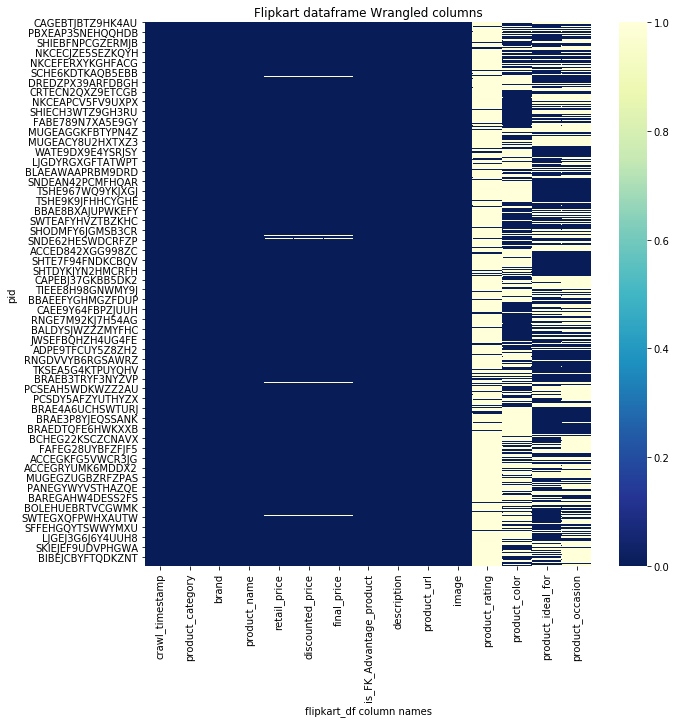

In [54]:
# product_specification is ready for merging based on 'pid' to the original dataframe
# We are performing a 'left' join here as we have to retain all the records in 
# the original dataframe(flipkart_df) and get matching rows from the joined 
# dataframe (product_specification)
flipkart_df=flipkart_df.join(product_specification,how='left')

# Examine the wrangled column
product_specification.head()

# Drop unwanted and duplicate columns
flipkart_df.drop(columns=['product_specifications','overall_rating','product_specifications.Brand','product_specifications.Type'],inplace=True)

# Rename columns with appropriate names
flipkart_df.rename(columns=
    {'product_specifications.Color':'product_color', 
     'product_specifications.Ideal For':'product_ideal_for', 
     'product_specifications.Occasion':'product_occasion', 
     'product_category_tree': 'product_category'},inplace=True)

# Re-order columns 
flipkart_df = flipkart_df.reindex(columns=['crawl_timestamp', 'product_category','brand', 'product_name',
  'retail_price', 'discounted_price','final_price', 'is_FK_Advantage_product',
 'description','product_url','image', 'product_rating', 
'product_color', 'product_ideal_for', 'product_occasion'])

# Visualize the amount of null data in columns of Flipkart Wrangled dataset
heatmap_nulls(flipkart_df,'Flipkart dataframe Wrangled columns','flipkart_df column names')

In [55]:
# store the cleaned and wrangled dataset to use it for further analysis in other jupyter notebooks
%store flipkart_df 

Stored 'flipkart_df' (DataFrame)


In [56]:
flipkart_df.head(2)

,crawl_timestamp,product_category,brand,product_name,retail_price,discounted_price,final_price,is_FK_Advantage_product,description,product_url,image,product_rating,product_color,product_ideal_for,product_occasion
pid,,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,Beauty and Personal Care,Denver,"Denver Caliber,Pride Combo Set",409.0,39.0,370.0,False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",http://www.flipkart.com/denver-caliber-pride-c...,http://img6a.flixcart.com/image/combo-gift-set...,NaN,NaN,Men,NaN
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,Beauty and Personal Care,Kolkata,Kolkata Knight Riders Combo Set,380.0,65.0,315.0,False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,http://www.flipkart.com/kolkata-knight-riders-...,http://img5a.flixcart.com/image/combo-gift-set...,NaN,NaN,NaN,NaN


In [57]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, CAGEBTJBTZ9HK4AU to ACCEKFVVHCJHKVCR
Data columns (total 15 columns):
crawl_timestamp            19998 non-null datetime64[ns]
product_category           19998 non-null category
brand                      19998 non-null object
product_name               19998 non-null category
retail_price               19920 non-null float64
discounted_price           19920 non-null float64
final_price                19920 non-null float64
is_FK_Advantage_product    19998 non-null bool
description                19996 non-null object
product_url                19998 non-null object
image                      19995 non-null object
product_rating             1849 non-null float64
product_color              9730 non-null object
product_ideal_for          13137 non-null object
product_occasion           9954 non-null object
dtypes: bool(1), category(2), datetime64[ns](1), float64(4), object(7)
memory usage: 2.8+ MB


 <a id='TOC'></a>
## Data Storytelling - Table of Contents


#### 1. <a href='#ReadWrangledDataset'>Read wrangled dataset</a>
#### 2. <a href='#ImportPackages'>Import required packages</a>
#### 3. <a href='#defineFunctions'>Define functions</a>
#### 4. <a href='#visualize'>Plot Visualizations</a>

 <a id='ReadWrangledDataset'></a>
 #### Read wrangled dataset
 <a href='#TOC'>Table Of Contents</a>

In [58]:
# Read the wrangled dataset from another jupyter notebook
%store -r 'flipkart_df'

 <a id='ImportPackages'></a>
 #### Import required packages
 <a href='#TOC'>Table Of Contents</a>

In [59]:
# Import all required packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 <a id='defineFunctions'></a>
#### Define functions
 <a href='#TOC'>Table Of Contents</a>

In [60]:
# Extract a list of categories with highest no. of products
def top_categories(size):
    ''' Returns a list of given size having category names with highest number of products'''
    categories_df=flipkart_df.product_category.value_counts().sort_values(ascending=False).head(size)
    categories = list(categories_df.index)
    return categories_df,categories

In [61]:
# Extracting dataframes specific to each category from wrangled dataset(flipkart_df)
def get_category_df(category_list):
    ''' Return list of dataframes specific to each category provided in the list '''
    return [flipkart_df[flipkart_df.product_category == i] for i in category_list]

In [62]:
# Plot bar graph 
def plot_bar(series):
    ''' Plots the bar graph from a given series '''
    
    series.plot.bar(x=series.index, y='product_category',alpha=0.7)
    
    # Set the title
    _ = plt.title('Top 10 Product Categories based on the no. of products')
    
    # Set the x-axis label
    _ = plt.xlabel('Product Categories')
    
    # Rotate the x-axis labels to 60 so, they don't overlap
    _ = plt.xticks(rotation=60)
    
    # Set the y-axis label
    _ = plt.ylabel('No. of Products')
    
    # Show the plot
    plt.show()

In [63]:
# Plot histogram of 4 one-dimensional arrays
def plot_histogram(a,b,c,d,name='label name',xlim=1):
    ''' Plot a 4x4 figure with histograms for 4 one-dimensional arrays'''
    
    # Create figure with dimensions
    fig = plt.figure(figsize=(12,8))
    
    # Create axes
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    # plot histograms
    ax1.hist(a[a.notnull()], bins=5,color='red',density=True)
    ax2.hist(b[b.notnull()], bins=5,color='green',density=True)
    ax3.hist(c[c.notnull()], bins=5,color='coral',density=True)
    ax4.hist(d[d.notnull()], bins=5,color='blue',density=True)
    
    # label the axes
    ax1.set_title('Clothing '+name )
    ax1.set_xticks(range(1,6))
    ax1.set_ylabel('Frequency')
    
    # label the axes
    ax2.set_title('Jewellery '+name )
    ax2.set_xticks(range(1,6))
    ax2.set_ylabel('Frequency')
    
    # label the axes
    ax3.set_title('Footwear '+name )
    ax3.set_xticks(range(1,6))
    ax3.set_ylabel('Frequency')
    
    # label the axes
    ax4.set_title('Mobiles '+name )
    ax4.set_xticks(range(1,6))
    ax4.set_ylabel('Frequency')
   
    plt.show()

In [64]:
# Visualize bar plot highest discounted price in each category
def plot_highest_discounted_product(stacked,colors_list):
    ''' Plot a stacked/unstacked bar graph based on given type '''
    # Extract required columns to plot
    viz = flipkart_df[['product_category','retail_price','final_price','discounted_price']]

    # Sort by highest discount price
    viz = viz.sort_values(by=['product_category','discounted_price'],ascending=False)

    # Drop duplicate columns - Retaining only the top discounted product in each product category
    viz.drop_duplicates(subset=['product_category'], keep='first', inplace=True)

    # Sort the filtered dataframe based on highest discount price
    viz.sort_values(by=['discounted_price'],inplace=True,ascending=False)

    # Set product category as the index - to categorize prices for each category
    viz.set_index('product_category',inplace=True)

    # Stacked bar graph comparing the retail, final and discount prices for 
    # highest discounted product from each of the top 10 categories
    _=plt.rcParams["figure.figsize"] = (12,8)

    # visualize stacked bar plot
    ax = viz[:10].plot.bar(stacked=stacked,color=colors_list)
    
    #label the axes
    plt.title('Top discounted price product from each of the top 10 categories')
    plt.xlabel('Product categories')
    plt.ylabel('Prices')
    plt.show()
    print(viz[:10])

In [65]:
# Empirical cummulative distribution function
def ecdf(data):
    ''' Compute ECDF for a one-dimensional array of measurements. '''
    # Total no. of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [66]:
# Plot the ecdf
def plot_ecdf(data, color,marker,label_name):
    ''' Plot the ECDF for one-dimensional array '''
    
    # Compute ECDF for given 1D array
    x, y = ecdf(data)
    
    # Plot the ECDF
    _ = plt.plot(x, y, marker=marker, color=color,linestyle='none', label=label_name)
    
    # Set the title
    _ = plt.title("Empirical CDF")
    
    # Label the axes
    _ = plt.xlabel("Discount price")
    _ = plt.ylabel("ECDF")
    
    # resolve the location of legend
    _ = plt.legend(loc='lower right')

In [67]:
def time_series():
    ''' Plotting Timeseries for Retail and Discount price for top 3 categories '''

    # Define which subplot to activate
    plt.subplot(2,2,1)
    
    # Rotate x ticks so the labels will not be cluttered
    plt.xticks(rotation=45)
    
    # Label the axes
    plt.ylabel('Retail Price')
    
    # Describe the plot by providing title
    plt.title('Retail price for top 3 categories: Jan\'2016 to Jul\'2016')
    
    # Plot a line plot
    plt.plot(clothing_df.loc['2016':,'retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016':,'retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016':,'retail_price'], color='mediumblue', label='Footwear')
    
    # Place a legend and provide its location
    plt.legend(loc='upper right')

    plt.subplot(2,2,2)
    plt.xticks(rotation=45)
    plt.ylabel('Discount Price')
    plt.title('Discount price for top 3 categories: Jan\'2016 to Jul\'2016')
    plt.plot(clothing_df.loc['2016':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016':,'discounted_price'], color='green', label='Footwear')
    plt.legend(loc='upper right')

    plt.subplot(2,2,3)
    plt.xticks(rotation=45)
    plt.ylabel('Retail Price')
    plt.title('Retail price of highest priced product: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15','retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15','retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15','retail_price'], color='mediumblue', label='Footwear')
    plt.legend(loc='upper left')

    plt.subplot(2,2,4)
    plt.xticks(rotation=50)
    plt.ylabel('Discount Price')
    plt.title('Discount price of highest priced product: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='green', label='Footwear')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [68]:
def time_series_inset_retail():
    ''' Timeseries Inset Plot based on retail price'''

    # Rotate x ticks so the labels will not be cluttered
    plt.xticks(rotation=45)
    
    # Label the axes
    plt.ylabel('Retail Price')
    
    # Describe the plot by providing title
    plt.title('Retail price for top 3 categories: Jan\'2016 to Jul\'2016')
    
    # Plot a line plot
    plt.plot(clothing_df.loc['2016':,'retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016':,'retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016':,'retail_price'], color='mediumblue', label='Footwear')
    
    # Place a legend and provide its location
    plt.legend(loc='upper right')
    plt.axes([0.60, 0.48, 0.15, 0.35])
    plt.xticks(rotation=45)
    plt.ylabel('Retail Price')
    plt.title('Highest: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15','retail_price'], color='teal', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15','retail_price'], color='coral', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15','retail_price'], color='mediumblue', label='Footwear')


In [69]:
def time_series_inset_discount():
    ''' Timeseries Inset Plot based on discount price '''
    plt.xticks(rotation=45)
    plt.ylabel('Discount Price')
    plt.title('Discount price for top 3 categories: Jan\'2016 to Jul\'2016')
    plt.plot(clothing_df.loc['2016-Jan':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016-Jan':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016-Jan':,'discounted_price'], color='green', label='Footwear')
    plt.legend(loc='upper right')
    plt.axes([0.56, 0.58, 0.15, 0.25])
    plt.xticks(rotation=50)
    plt.ylabel('Discount Price')
    plt.title('Highest: Jan 01 to Jan 07')
    plt.plot(clothing_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='blue', label='Clothing')
    plt.plot(jewellery_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='red', label='Jewellery')
    plt.plot(footwear_df.loc['2016-01-01':'2016-01-15':,'discounted_price'], color='green', label='Footwear')

<a id='visualize'></a>
#### Visualizations
<a href='#TOC'>Table Of Contents</a>

## Top 10 product categories with highest number of products:
1. Product Category "Clothing" has more than 6000 products establishing it as a category with highest number of products.
2. Product Category "Jewellery" has more than 3500 products allowing it to be the second highest category of products.
3. The next four categories depict that, they have less than 1500 products in each category.
4. The bottom four categories depict that, they have less than 1000 products in each cotegory.
5. All the remaining categories can be interpreted as having less than 600 products.

                Product Categories  Number_of_Products
               -------------------  ------------------
                          Clothing	6290
                         Jewellery	3588
                          Footwear	1260
             Mobiles & Accessories	1099
                        Automotive	1018
        Home Decor & Festive Needs	931
          Beauty and Personal Care	710
                   Home Furnishing	700
                  Kitchen & Dining	647
                         Computers	588

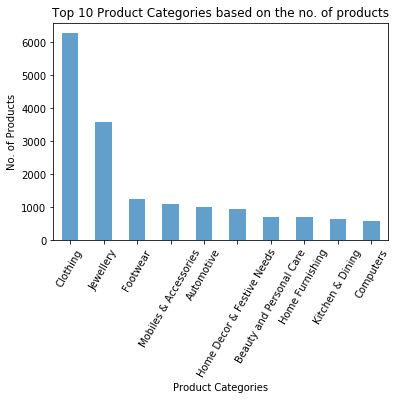

,Number of Products
Clothing,6290
Jewellery,3588
Footwear,1260
Mobiles & Accessories,1099
Automotive,1018
Home Decor & Festive Needs,931
Beauty and Personal Care,710
Home Furnishing,700
Kitchen & Dining,647
Computers,588


In [70]:
# Plot bar graph for top 10 categories having highest number of products
df_10, _ = top_categories(10)
plot_bar(df_10)
df_10.to_frame().rename(columns={'product_category':'Number of Products'})

## Top 10 categories with highest discount priced product

----

The prices of Category "Furniture" are much higher when compared to other categories

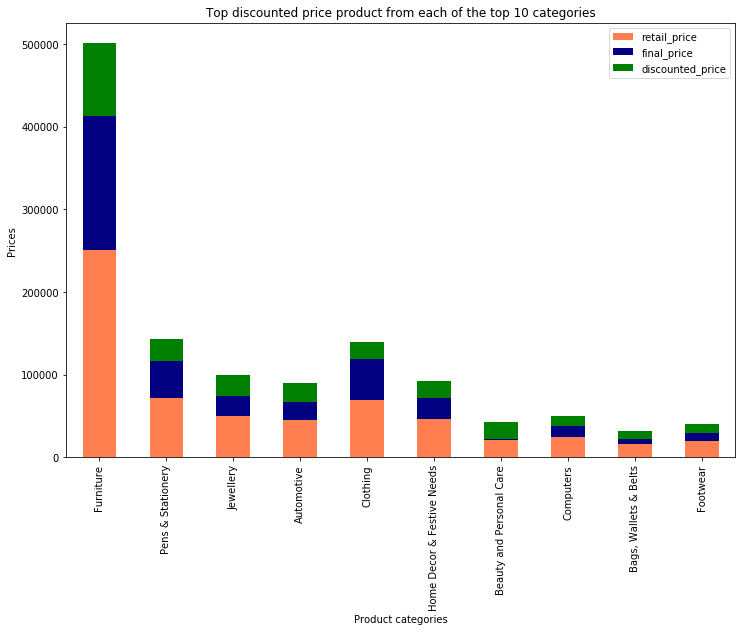

                            retail_price  final_price  discounted_price
product_category                                                       
Furniture                       250500.0     162825.0           87675.0
Pens & Stationery                71687.0      44804.0           26883.0
Jewellery                        49999.0      24580.0           25419.0
Automotive                       44880.0      22440.0           22440.0
Clothing                         69999.0      48999.0           21000.0
Home Decor & Festive Needs       46500.0      25510.0           20990.0
Beauty and Personal Care         21125.0       1700.0           19425.0
Computers                        25000.0      13390.0           11610.0
Bags, Wallets & Belts            15999.0       5890.0           10109.0
Footwear                         19995.0       9997.0            9998.0


In [71]:
# Stacked Bar graph comparing the retail, final and discount prices for top 10 categories
plot_highest_discounted_product(stacked=True,colors_list=['coral','navy','green'])

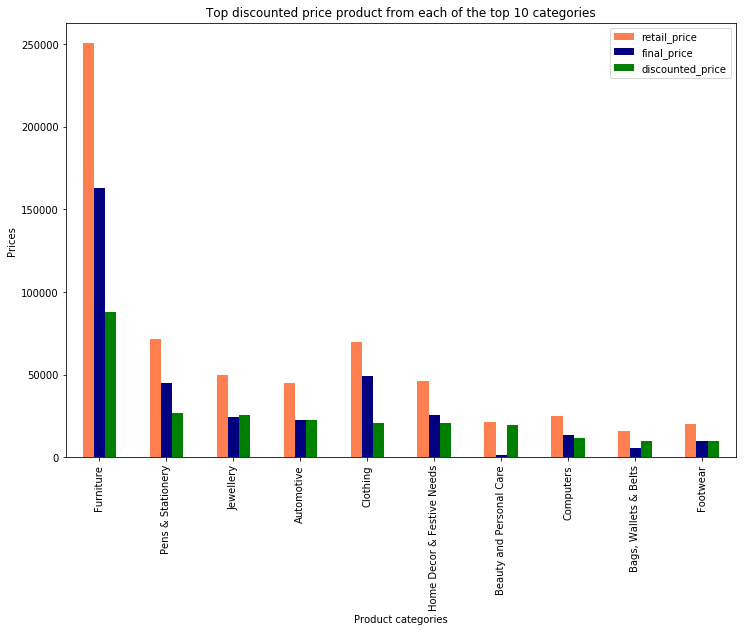

                            retail_price  final_price  discounted_price
product_category                                                       
Furniture                       250500.0     162825.0           87675.0
Pens & Stationery                71687.0      44804.0           26883.0
Jewellery                        49999.0      24580.0           25419.0
Automotive                       44880.0      22440.0           22440.0
Clothing                         69999.0      48999.0           21000.0
Home Decor & Festive Needs       46500.0      25510.0           20990.0
Beauty and Personal Care         21125.0       1700.0           19425.0
Computers                        25000.0      13390.0           11610.0
Bags, Wallets & Belts            15999.0       5890.0           10109.0
Footwear                         19995.0       9997.0            9998.0


In [72]:
# Unstacked Bar graph comparing the retail, final and discount prices for top 10 categories
plot_highest_discounted_product(stacked=False,colors_list=['coral','navy','green'])

## Top 4 Categories with more number of ratings

Product ratings are classified with bands(1-5) as follows:

    5 - Excellent
    4 - Very good
    3 - Good
    2 - Average
    1 - Poor

After exploring the below graphs of Product ratings, "Jewellery" Product category has the highest number of ratings with 80% of them classified under "Excellent" bands when compared to  other categories which have only about 50% of their ratings under the top band. 

Also, Product Category "Mobiles" tend to have more "poor" ratings when compared to other categories.

In [73]:
# Extract category specific datasets
_, category_list = top_categories(4)
clothing_df, jewellery_df, footwear_df, mobiles_df = get_category_df(category_list)

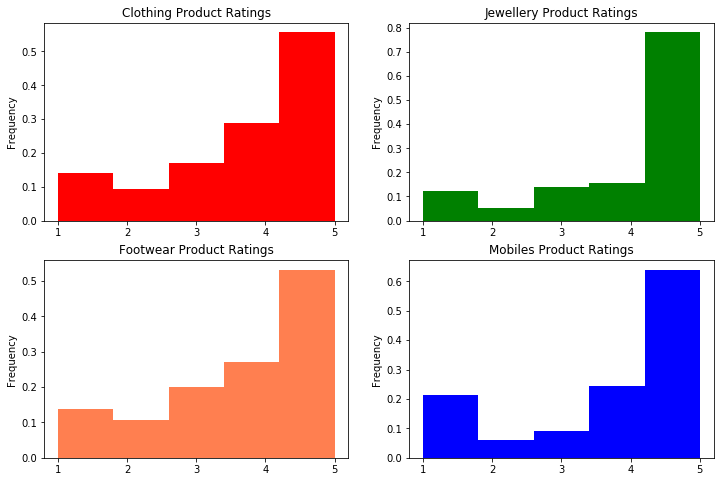

In [74]:
# Plot histogram of product ratings for top 4 categories 
plot_histogram(clothing_df.product_rating,jewellery_df.product_rating,footwear_df.product_rating,mobiles_df.product_rating,name='Product Ratings')

## Compare the Discount prices of top 4 categories with highest no. of products.

From the ECDFs below, the rate of discount price has seen a decline in the "Jewellery" category  after 80%.

The maximum Discount price for 

    1. "Clothing" category = 20,000
    2. "Footwear" category = 10,000
    3. "Jewellery" category = 25,000

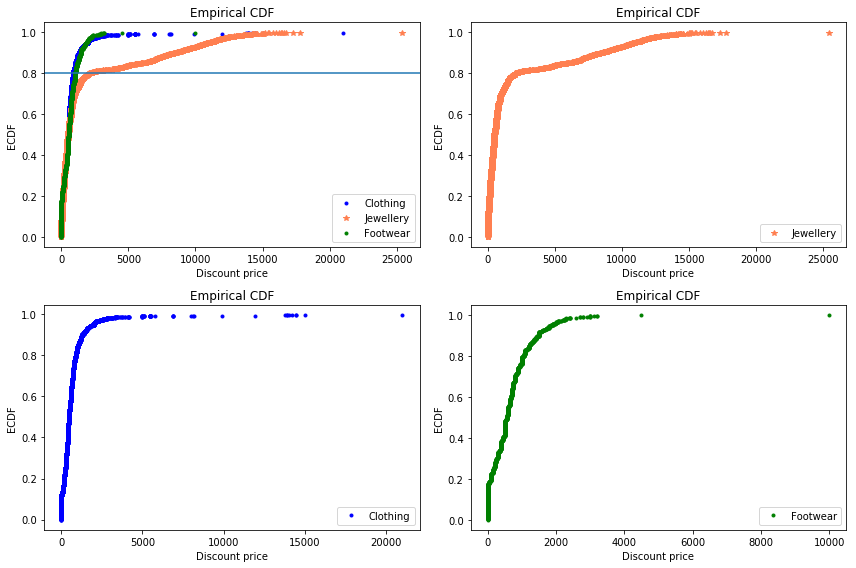

In [75]:
# ECDF's for top 4 categories based on discount prices
plt.subplot(2,2,1)
plot_ecdf(clothing_df.discounted_price,color='blue',marker='.',label_name='Clothing')
plot_ecdf(jewellery_df.discounted_price,color='coral',marker='*',label_name='Jewellery')
plot_ecdf(footwear_df.discounted_price,color='green',marker='.',label_name='Footwear')
plt.axhline(y=.8)
plt.subplot(2,2,2)
plot_ecdf(jewellery_df.discounted_price,color='coral',marker='*',label_name='Jewellery')
plt.subplot(2,2,3)
plot_ecdf(clothing_df.discounted_price,color='blue',marker='.',label_name='Clothing')
plt.subplot(2,2,4)
plot_ecdf(footwear_df.discounted_price,color='green',marker='.',label_name='Footwear')
plt.tight_layout()

## Top 3 categories - examine Retail Price for outliers

It is clear from the below box plot, that there are outlier for "Clothing" category and "Footwear" category. Jewellery category has its prices distributed evenly.

In [76]:
# Create a subset of flipkart_df having data only for top 3 cateories
top3_categories = flipkart_df[flipkart_df.product_category.isin(['Clothing','Jewellery','Footwear'])][['retail_price','product_category','discounted_price','final_price','product_rating','is_FK_Advantage_product']]
top3_categories.product_category = top3_categories.product_category.astype('str')
top3_categories.product_category=top3_categories.product_category.astype('category')

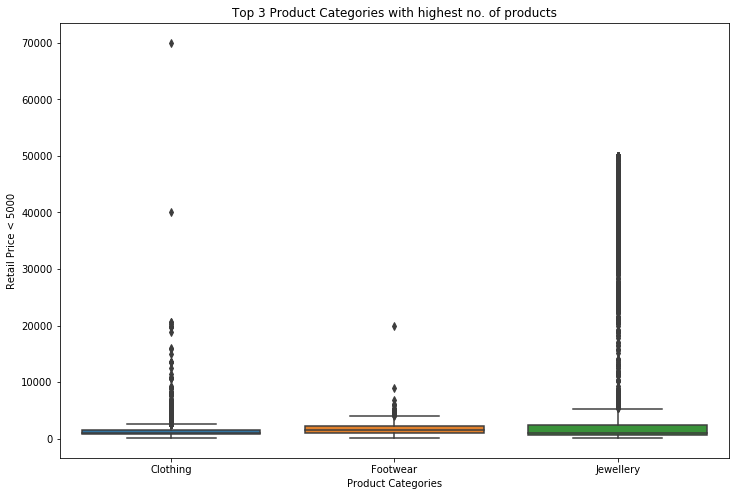

In [77]:
# Plot a box plot to visualize any outliers in Retail Price
sns.boxplot(x='product_category',y='retail_price',data=top3_categories)
plt.title('Top 3 Product Categories with highest no. of products')
plt.ylabel('Retail Price < 5000')
plt.xlabel('Product Categories')

# Removing outliers for further analysis
top3_categories=top3_categories[top3_categories.retail_price < 20000]

## Top 3 categories - examine Retail Price after removing outliers

It can interpreted from the below plot, that more number of products have their retail price less than 5000

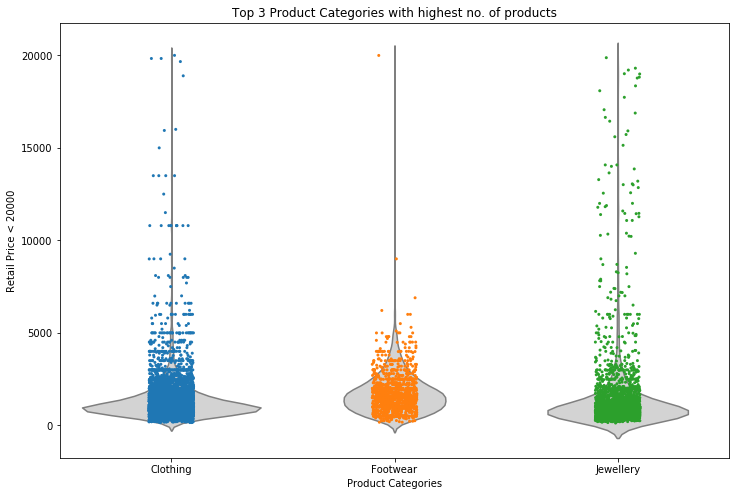

In [78]:
# Violin and Strip plot of retail prices
_ = sns.violinplot(x='product_category',y='retail_price',data=top3_categories,size=3,inner=None,color='lightgray')
_ = sns.stripplot(x='product_category',y='retail_price',data=top3_categories,size=3,jitter=True)
_ = plt.title('Top 3 Product Categories with highest no. of products')
_ = plt.ylabel('Retail Price < 20000')
_ = plt.xlabel('Product Categories')

KeyboardInterrupt: 

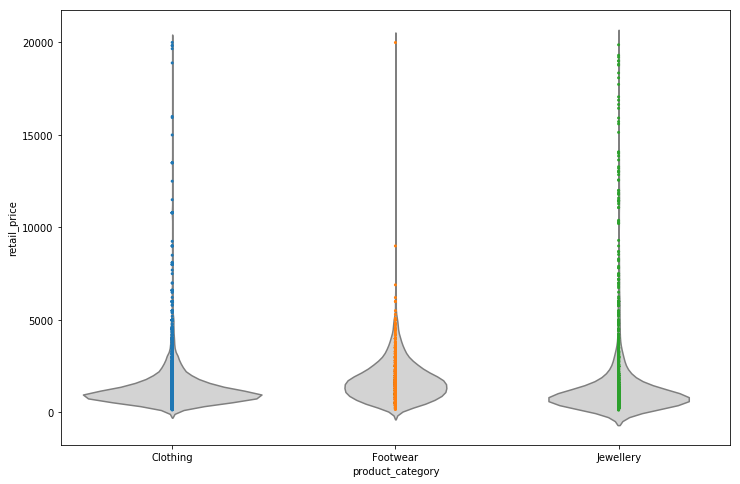

In [79]:
# Violin and Swarm plot of retail prices
_ = sns.violinplot(x='product_category',y='retail_price',data=top3_categories,size=3,inner=None,color='lightgray')
_ = sns.swarmplot(x='product_category',y='retail_price',data=top3_categories,size=3)
_ = plt.title('Top 3 Product Categories with highest no. of products')
_ = plt.ylabel('Retail Price < 20000')
_ = plt.xlabel('Product Categories')

In [ ]:
# Box plot of retail prices
_ = sns.boxplot(x='product_category',y='retail_price',data=top3_categories)
_ = plt.title('Top 3 Product Categories with highest no. of products')
_ = plt.ylabel('Retail Price < 20000')
_ = plt.xlabel('Product Categories')

## Identifying correlation between retail and discount price

It can interpreted from the below plot that there is a positive correlation between retail and discount price. But, how strongly these two quantities are correlated need to be analyzed further using inferential statistical methods. 

In [ ]:
_ = sns.lmplot(x="retail_price", y="discounted_price", col="product_category", hue="product_category",
                data=top3_categories, col_wrap=3,height=5,aspect=.8)

## Identifying Residuals

It can be interpreted from the below plot that most of the data points are closer to the regression line, with outliers far away from the line which was identified earlier from the box plot.

In [ ]:
# Plotting the Residuals
c=clothing_df[clothing_df.retail_price.notnull() & clothing_df.retail_price.notnull()]
j=jewellery_df[jewellery_df.retail_price.notnull() & jewellery_df.retail_price.notnull()]
f=footwear_df[footwear_df.retail_price.notnull() & footwear_df.retail_price.notnull()]
plt.subplot(3,1,1)
ax1 = sns.residplot(x='retail_price',y='discounted_price',data=c,color='blue',label='Clothing')
plt.title('Residual Plot - Retail vs Discount Price')
plt.legend(loc='lower left')
plt.subplot(3,1,2)
ax2 = sns.residplot(x='retail_price',y='discounted_price',data=f,color='coral',label='Footwear')
plt.ylabel('Discount Price')
plt.legend(loc='lower left')
plt.subplot(3,1,3)
ax3 = sns.residplot(x='retail_price',y='discounted_price',data=j,color='green',label='Jewellery')
plt.xlabel('Retail Price')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Analysing Time Series -

It can interpreted from the below plots that highest priced products are added in Quarter 1. "Clothing" category has more discounted products than the other two categories.

In [ ]:
# Plotting Time series  
# Set the index to DatetimeIndex
clothing_df.set_index('crawl_timestamp',inplace=True)
jewellery_df.set_index('crawl_timestamp',inplace=True)
footwear_df.set_index('crawl_timestamp',inplace=True)
mobiles_df.set_index('crawl_timestamp',inplace=True)

In [ ]:
time_series()

In [ ]:
time_series_inset_retail()

In [ ]:
time_series_inset_discount()

 <a id='TOC'></a>
## Statistical Analysis - Table of Contents


#### 1. <a href='#ReadWrangledDataset'>Read wrangled dataset</a>
#### 2. <a href='#ImportPackages'>Import required packages</a>
#### 3. <a href='#setPlotProps'>Set default plot properties</a>
#### 3. <a href='#defineFunctions'>Define functions</a>
#### 4. <a href='#stat'>Statistical Analysis</a>

 <a id='ReadWrangledDataset'></a>
 #### Read wrangled dataset
 <a href='#TOC'>Table Of Contents</a>

In [ ]:
# Read the wrangled dataset from another jupyter notebook
%store -r flipkart_df

 <a id='ImportPackages'></a>
 #### Import required packages
 <a href='#TOC'>Table Of Contents</a>

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 <a id='setPlotProps'></a>
 #### Set default plot properties
 <a href='#TOC'>Table Of Contents</a>

In [ ]:
# setting default plot properties
sns.set(style="whitegrid")
_ = plt.rcParams["figure.figsize"] = (12,8)

 <a id='defineFunctions'></a>
#### Define functions
 <a href='#TOC'>Table Of Contents</a>

In [ ]:
# Empirical cummulative distribution function
def ecdf(data):
    ''' Compute ECDF for a one-dimensional array of measurements. '''
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [ ]:
# Plot the ecdf
def plot_ecdf(data, label_name):
    ''' Plot the ECDF for one-dimensional array '''
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker='.', linestyle='none', label=label_name)
    _ = plt.title("Empirical CDF")
    _ = plt.xlabel("Price")
    _ = plt.ylabel("ECDF")
    _ = plt.legend()

In [ ]:
# Bootstrap Sampling
def bootstrap_replicates(x,func,size=10000):
    ''' Calculate the bootstrap replicates for a one-dimensional array '''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(x,size=len(x))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

In [ ]:
# Permutation sample
def perm_sample(x,y):
    ''' Compute a permutation sample for two one-dimensional arrays'''
    con=np.concatenate((x,y))
    perm=np.random.permutation(con)
    perm_x=perm[:len(x)]
    perm_y=perm[len(x):]
    return perm_x,perm_y

In [ ]:
# Plot the ecdf
def plot_perm_ecdf(x_org_0,x_org_1,size=100) :
    for _ in range(size):
        perm0,perm1=perm_sample(x_org_0,x_org_1)
        x_0,y_0 = ecdf(perm0)
        x_1,y_1 = ecdf(perm1)
        _ = plt.plot(x_0,y_0,marker='.',linestyle='none',alpha=0.4)
        _ = plt.plot(x_1,y_1,marker='.',linestyle='none',alpha=0.4)

<a id='stat'></a>
####  Is the discount price distribution same for FK_Advantage products vs non FK_advantage products ?
As we are concerned about the distribution of the values - we can perform a bootstrap

permutation test to find if there is really a difference in distributions?

Null Hypothesis: Both have identical discount price distributions

Alternate Hypothesis: There's a difference in Discount price distributions

##### Verify if both have the identical distributions using Bootstrapping & Hypothesis testing.

 <a href='#TOC'>Table Of Contents</a>


In [ ]:
# Considering top 4 categories - with highest number of products
pd=flipkart_df.product_category.value_counts().sort_values(ascending=False).head(4)
pd.to_frame().head()

In [ ]:
# Extracting top 4 categories as list
top_4_categories = list(pd.index)

In [ ]:
# Extracting dataframes specific to each category from wrangled dataset(flipkart_df)
def get_category_df(list):
    ''' Get dataframes specific to each category '''
    return [flipkart_df[flipkart_df.product_category == i] for i in list]

In [ ]:
clothing_df,jewellery_df,footwear_df,mobiles_df = get_category_df(top_4_categories)

In [ ]:
clothing_df = flipkart_df[flipkart_df.product_category == 'Clothing']

# FK_Advantage_product
clothing_df_1 = clothing_df[clothing_df.is_FK_Advantage_product]

# Non FK_Advantage_product
clothing_df_0 = clothing_df[clothing_df.is_FK_Advantage_product == False]

# Counts of advantage vs non-advantage
clothing_df_1.shape,clothing_df_0.shape

In [ ]:
# Calculate the ecdfs from observed data
x_org_0,y_org_0 = ecdf(clothing_df_0.discounted_price)
x_org_1,y_org_1 = ecdf(clothing_df_1.discounted_price)

# Plot the original ecdfs based on observed data
_= plt.plot(x_org_0,y_org_0,marker='.',linestyle='none')
_= plt.plot(x_org_1,y_org_1,marker='.',linestyle='none')


In [ ]:
# plot the original ecdfs
plot_ecdf(clothing_df_0.discounted_price,label_name='Non_FK_Advantage')
plot_ecdf(clothing_df_1.discounted_price,label_name='FK_Advantage')

# calculate and plot the cdf from permutation samples
plot_perm_ecdf(clothing_df_0.discounted_price,clothing_df_1.discounted_price)

Notice how the permutation sample ECDF's overlap with the observed data, suggesting that the 
hypothesis is commensurate with the data - Discount prices for flipkart advantage products
and non flipkart advantage products are identically distributed.

#### Does discount_price and retail_price positively correlated?

In [ ]:
# Identifying a linear model

# Excluding the outliers
clothing_df=clothing_df[clothing_df.retail_price < 7000] 

# Plotting only discounted products
scatter_df = clothing_df[clothing_df.discounted_price > 0.0] 
_ = plt.scatter(scatter_df.retail_price,scatter_df.discounted_price)

# Calculate a linear regression with least squares regression : np.polyfit
slope,intercept = np.polyfit(scatter_df.retail_price,scatter_df.discounted_price,1)

# Plot the regression line
_ = plt.plot(scatter_df.retail_price, slope * scatter_df.retail_price + intercept,linestyle='-',color='r' )

# label the axis
_ = plt.xlabel('retail price')
_ = plt.ylabel('discounted price')
_ = plt.title('Retail Vs Discounted Price')

In [ ]:
# Plot the ecdf for retail & discount price - for clothing category
plot_ecdf(clothing_df.retail_price,label_name='Retail Price')
plot_ecdf(clothing_df.discounted_price,label_name='Discount Price')

In [ ]:
df_FK=flipkart_df.query('is_FK_Advantage_product == True & product_category == "Clothing"')['retail_price']
df = flipkart_df.query('is_FK_Advantage_product == False & product_category == "Clothing" & retail_price < 5000')['retail_price']

In [ ]:
df_FK

In [ ]:
df =df.reset_index()

In [ ]:
df.drop(columns=['pid'])

In [ ]:
plt.hist(df_FK,bins='auto',density=1)
plt.show()